In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,precision_score,recall_score,ConfusionMatrixDisplay,accuracy_score

# Read CSV

In [ ]:
filepath = "telecom_churn.csv"
df = pd.read_csv(filepath)

In [6]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(3333, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


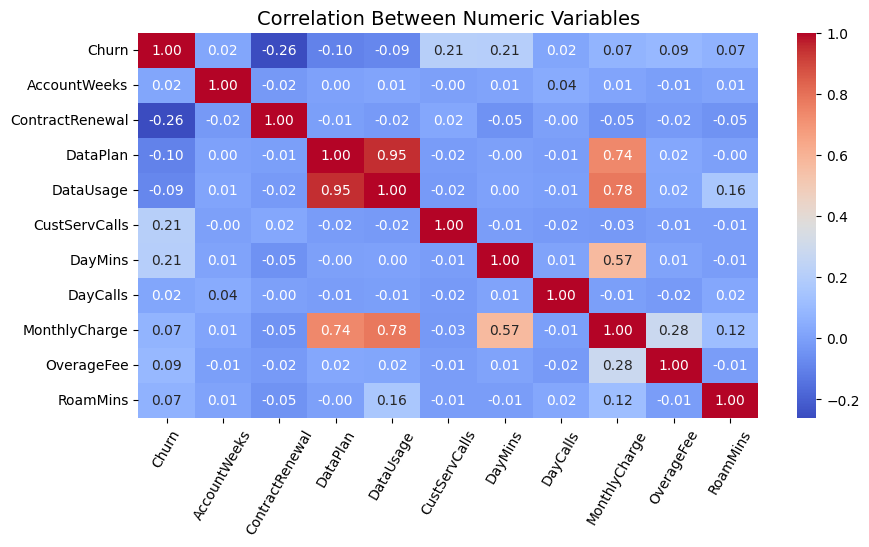

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Numeric Variables", fontsize=14)
plt.xticks(rotation=60)
plt.show()

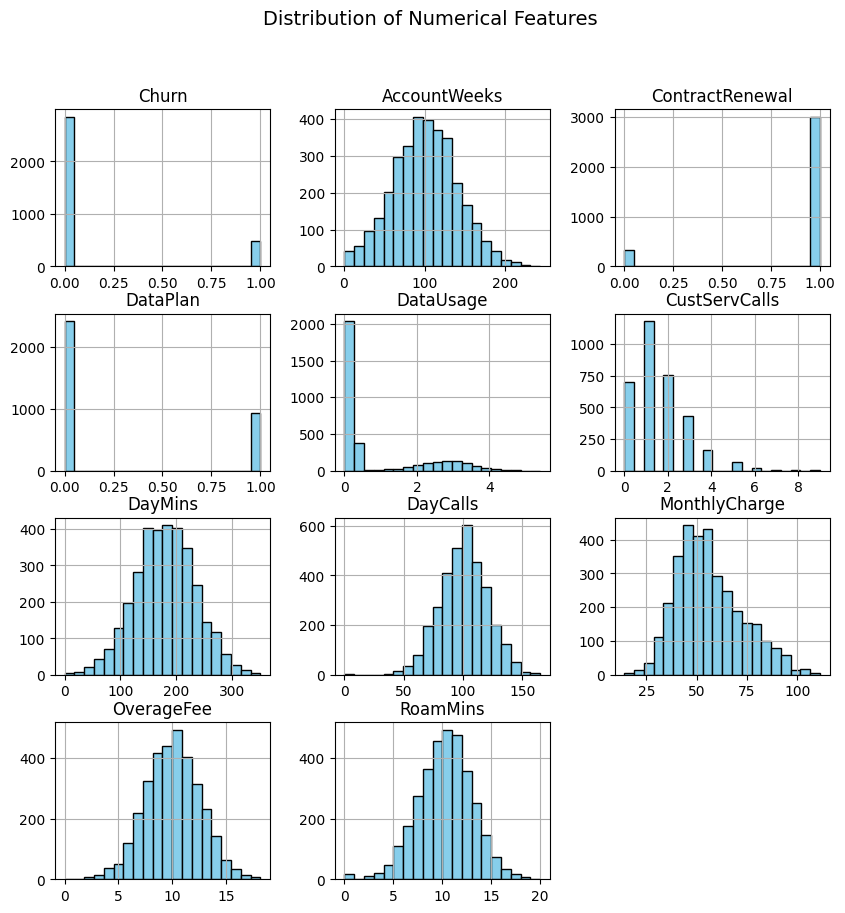

In [14]:
df.hist(figsize=(10, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.show()

In [15]:
df_cat = df.copy()

for cat_col in ["Churn", "DataPlan"]:
    df_cat[cat_col] = list("Yes" if data == 1 else "No" for data in df_cat[cat_col])
    df_cat[cat_col] = df_cat[cat_col].astype("category")

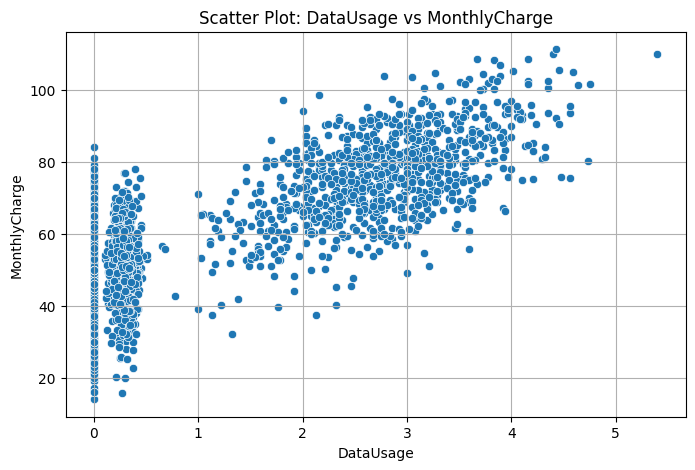

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['DataUsage'], y=df['MonthlyCharge'])
plt.xlabel('DataUsage')
plt.ylabel('MonthlyCharge')
plt.title('Scatter Plot: DataUsage vs MonthlyCharge')
plt.grid(True)
plt.show()

In [17]:
vars_cont = [
    "DataUsage",
    "DayMins",
    "MonthlyCharge",
    "OverageFee",
    "RoamMins"
]

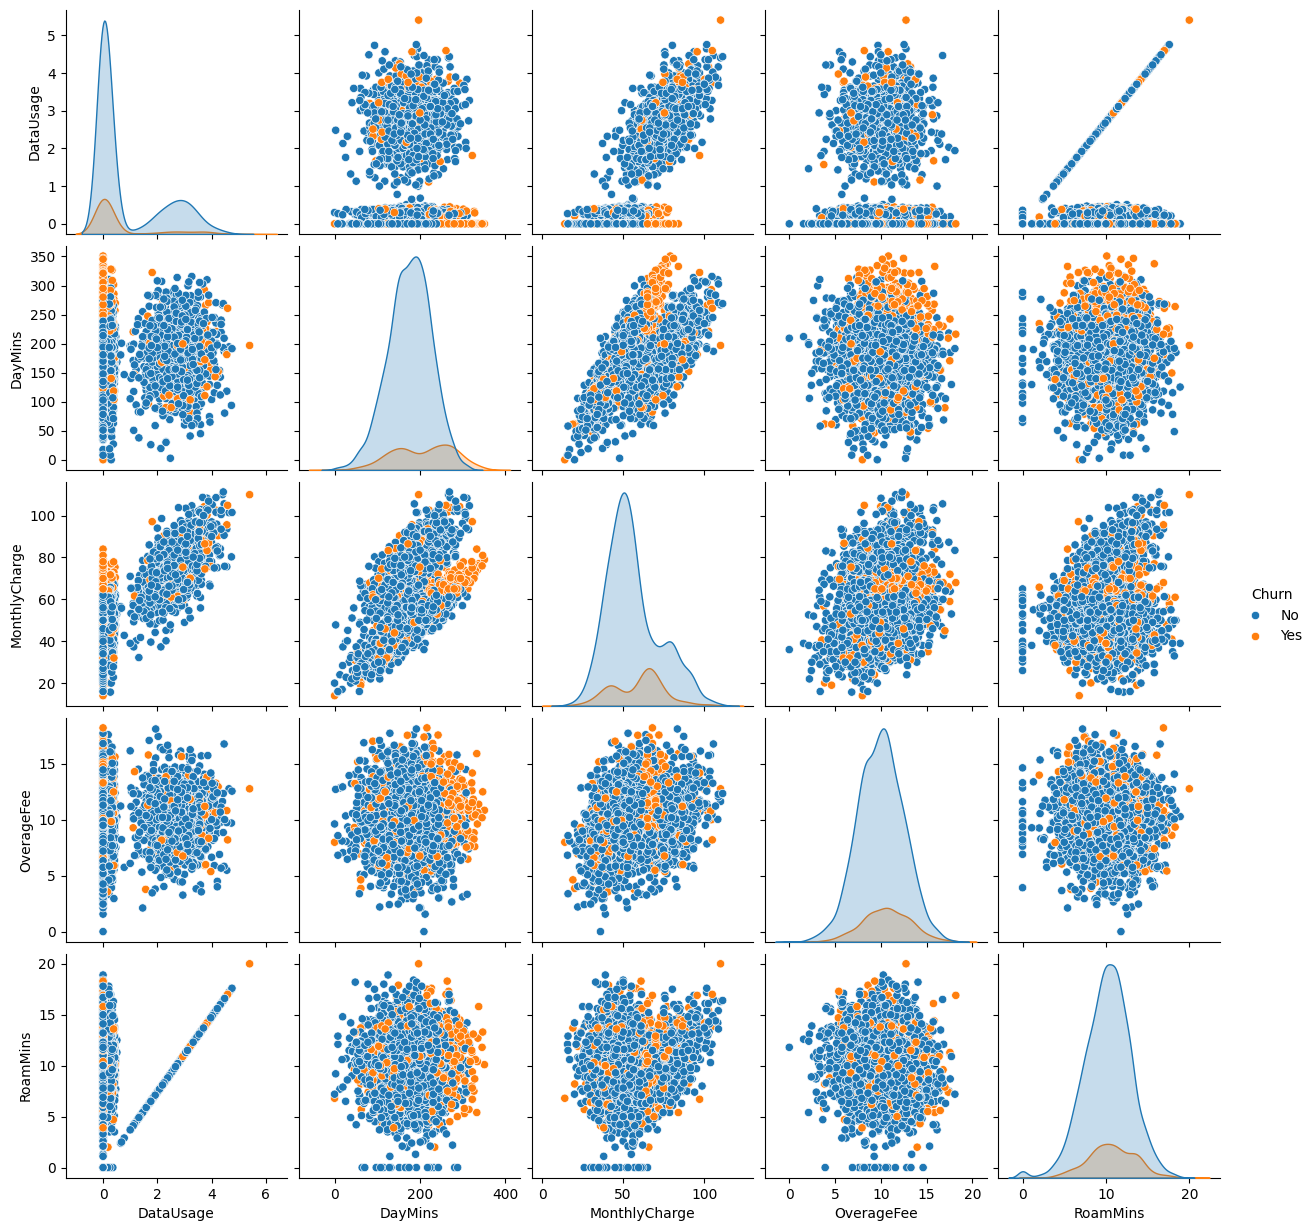

In [18]:
sns.pairplot(data=df_cat,vars=vars_cont,hue="Churn")

In [19]:
cols = ["DayMins","MonthlyCharge","AccountWeeks","DayCalls","OverageFee","RoamMins"]
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
DayMins,-0.029077
MonthlyCharge,0.594498
AccountWeeks,0.096606
DayCalls,-0.111787
OverageFee,-0.023845
RoamMins,-0.245136


In [20]:
oldMonthlyCharge = df["MonthlyCharge"]

In [21]:
df["MonthlyCharge"] = np.log1p(df["MonthlyCharge"])

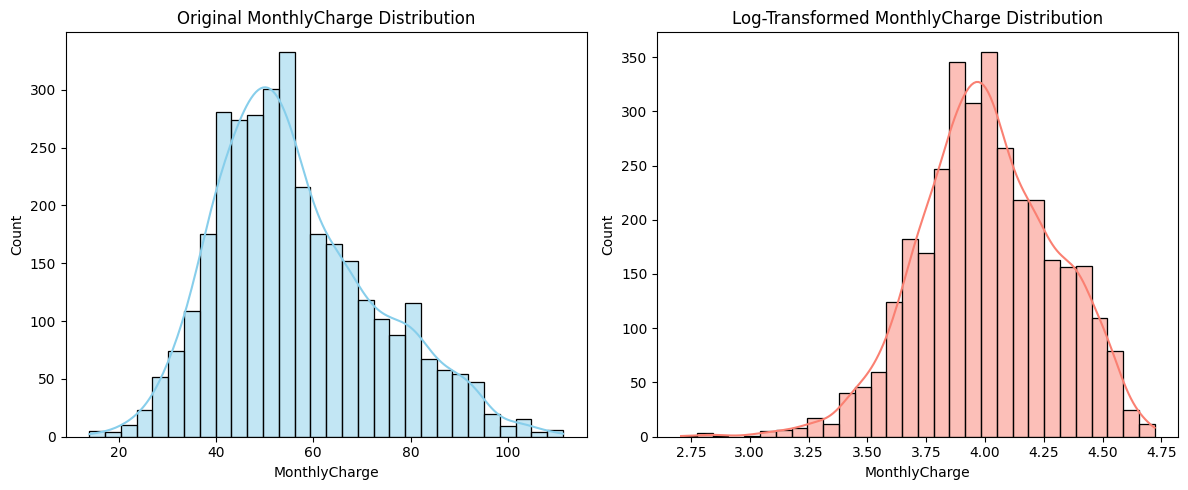

In [22]:
plt.figure(figsize=(12, 5))

# Plot original MonthlyCharge distribution
plt.subplot(1, 2, 1)
sns.histplot(oldMonthlyCharge, kde=True, bins=30, color="skyblue")
plt.title("Original MonthlyCharge Distribution")


# Plot transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df["MonthlyCharge"], kde=True, bins=30, color="salmon")
plt.title("Log-Transformed MonthlyCharge Distribution")

plt.tight_layout()
plt.show()

# Feature Scaling

In [23]:
# scaler = StandardScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Check for Class Imbalance

In [24]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [25]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y,shuffle=True)

In [27]:
smt = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

In [28]:
y_train_resampled.value_counts().to_frame()

,count
Churn,
0,2280
1,2280


# Standardization

In [29]:
scaler = StandardScaler()
x_train_resampled = scaler.fit_transform(X_train_resampled)
x_test = scaler.transform(X_test)

# Logistic regression model

In [30]:
model = LogisticRegression()
model.fit(X_train_resampled,y_train_resampled)

c:\Users\Rudra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# prediction on training data

In [31]:
prediction_on_training_data = model.predict(X_train_resampled)
accuracy_on_training_data = accuracy_score(y_train_resampled, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.8021929824561403


In [32]:
prediction_on_test_data = model.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.7781109445277361


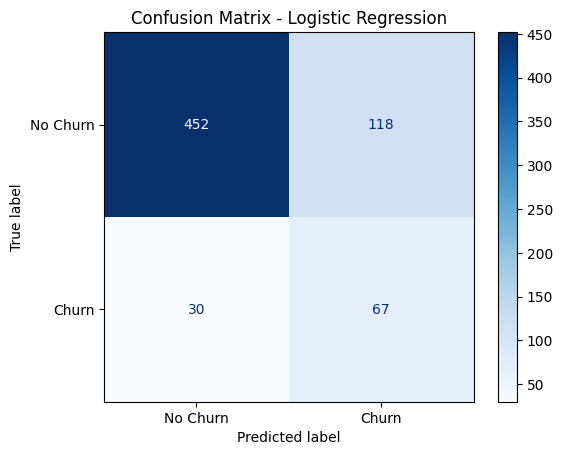

In [33]:
cm = confusion_matrix(y_test, prediction_on_test_data)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [34]:
classification_report(y_test, prediction_on_test_data)

'              precision    recall  f1-score   support\n\n           0       0.94      0.79      0.86       570\n           1       0.36      0.69      0.48        97\n\n    accuracy                           0.78       667\n   macro avg       0.65      0.74      0.67       667\nweighted avg       0.85      0.78      0.80       667\n'

In [36]:
rf_Recall = recall_score(y_test, prediction_on_test_data)
rf_Precision = precision_score(y_test, prediction_on_test_data)
rf_f1 = f1_score(y_test, prediction_on_test_data)
rf_accuracy = accuracy_score(y_test, prediction_on_test_data)

In [37]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Logistic Regression model', 'output')
rf_score

,Logistic Regression model,Recall,Precision,F1 Score,Accuracy
0,output,0.690722,0.362162,0.475177,0.778111


In [38]:
fpr, tpr, thresholds = roc_curve(y_test, prediction_on_test_data)
auc = roc_auc_score(y_test, prediction_on_test_data)

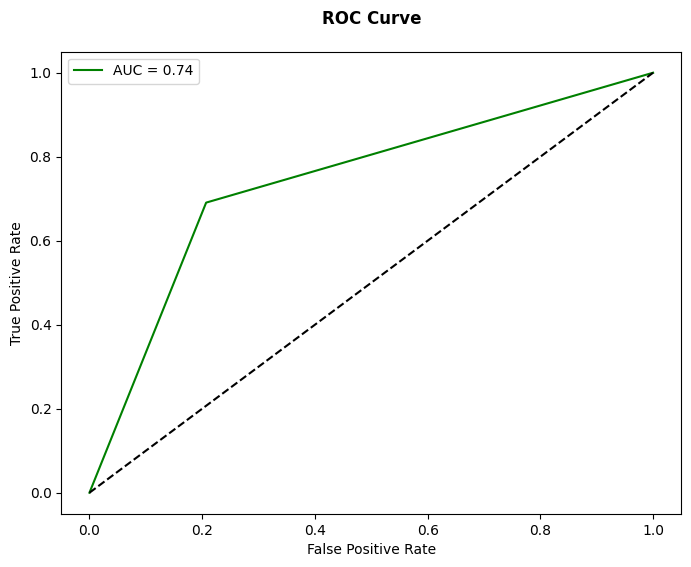

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()